In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['text.usetex'] = True

In [ ]:
# sudo apt-get update -y
# sudo apt-get install -y dvipng

In [111]:
def cascade(generateur, nb_iterations):
    fractal = generateur
    for i in range(nb_iterations):
        fractal = np.kron(fractal, generateur)
    return(fractal)

In [21]:
im = np.array([['p1', 'p_2'],['p_3', 'p_4']])
im1 = np.zeros((2,2))

In [22]:
im2 = np.zeros((4,4))

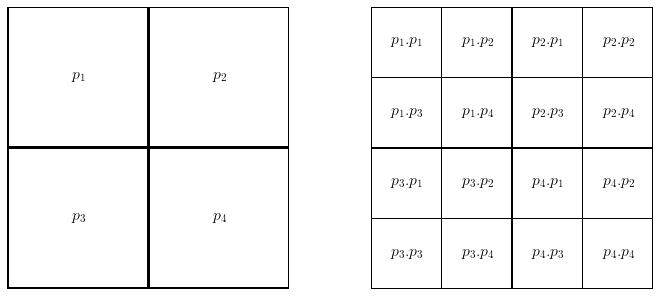

In [68]:
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 4))

axs[0].pcolormesh(im1, edgecolors='k', linewidth=2, cmap='gist_yarg')
axs[0].set_aspect(1)
axs[0].set_axis_off()
axs[0].text(0.5, 1.5, r'$p_1$', ha="center", va="center", color="black", fontsize=16)
axs[0].text(1.5, 1.5, r'$p_2$', ha="center", va="center", color="black", fontsize=16)
axs[0].text(0.5, 0.5, r'$p_3$', ha="center", va="center", color="black", fontsize=16)
axs[0].text(1.5, 0.5, r'$p_4$', ha="center", va="center", color="black", fontsize=16)

axs[1].pcolormesh(im2, edgecolors='k', linewidth=0.5, cmap='gist_yarg')
axs[1].pcolormesh([0,4], [0,4],im1, edgecolors='k', linewidth=40, cmap='gist_yarg', alpha=0 )
axs[1].grid(linestyle='--')
axs[1].set_aspect(1)
axs[1].set_axis_off()

lab = [r'$p_3.p_3$', r'$p_3.p_4$', r'$p_4.p_3$', r'$p_4.p_4$',
      r'$p_3.p_1$', r'$p_3.p_2$', r'$p_4.p_1$', r'$p_4.p_2$',
      r'$p_1.p_3$', r'$p_1.p_4$', r'$p_2.p_3$', r'$p_2.p_4$',
      r'$p_1.p_1$', r'$p_1.p_2$', r'$p_2.p_1$', r'$p_2.p_2$']
t = 0
for i,vi in enumerate(np.arange(0.5, 4.5)):
    for j,vj in enumerate(np.arange(0.5, 4.5)):
        axs[1].text(vj, vi, lab[t], ha="center", va="center", color="black", fontsize=16)
        t = t+1

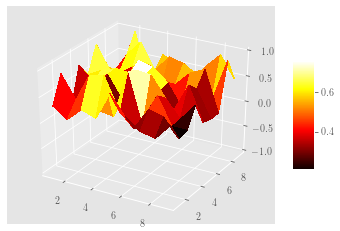

In [94]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(1, 10)
Y = np.arange(1, 10)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y, Z2, rstride=1, cstride=1, cmap='hot', linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [92]:
Z2 = np.random.rand(81).reshape(9,9)

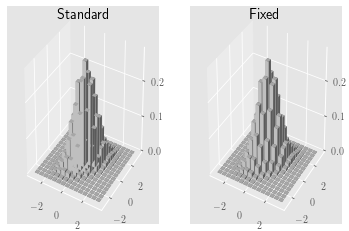

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal


def sph2cart(r, theta, phi):
    '''spherical to cartesian transformation.'''
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def sphview(ax):
    '''returns the camera position for 3D axes in spherical coordinates'''
    r = np.square(np.max([ax.get_xlim(), ax.get_ylim()], 1)).sum()
    theta, phi = np.radians((90-ax.elev, ax.azim))
    return r, theta, phi

def ravzip(*itr):
    '''flatten and zip arrays'''
    return zip(*map(np.ravel, itr))

#Generate data
res = 15
sl = slice(-3, 3, complex(res))
Y, X = np.mgrid[sl, sl]
grid = np.array([X, Y])
(dx,), (dy,) = 0.8*np.diff(X[0,:2]), 0.8*np.diff(Y[:2,0])

#2D Gaussian
mu = (0, 0)
covm = np.array([[ 0.8,  0.3],
                 [ 0.3,  0.5]])
rv = multivariate_normal(mu, covm)
Zg = rv.pdf(grid.transpose(1,2,0)).T

#generate the figure
fig, (ax1, ax2) = plt.subplots(1,2, subplot_kw=dict(projection='3d'))

#standard bar3d
ax1.set_title('Standard')
ax1.bar3d(X.ravel(), Y.ravel(), np.zeros(X.size), dx, dy, Zg.ravel(), '0.85')

#Fixed bar3d
ax2.set_title('Fixed')

xyz = np.array(sph2cart(*sphview(ax2)), ndmin=3).T       #camera position in xyz
zo = np.multiply([X, Y, np.zeros_like(Zg)], xyz).sum(0)  #"distance" of bars from camera

bars = np.empty(X.shape, dtype=object)
for i, (x,y,dz,o) in enumerate(ravzip(X, Y, Zg, zo)):
    j, k = divmod(i, res)
    bars[j, k] = pl = ax2.bar3d(x, y, 0, dx, dy, dz, '0.85')
    pl._sort_zpos = o

plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

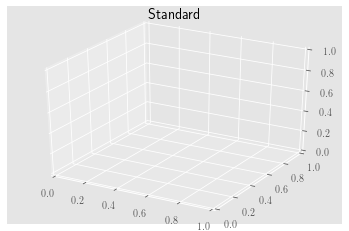

In [227]:
#generate the figure
fig, (ax1) = plt.subplots(1,1, subplot_kw=dict(projection='3d'))
#standard bar3d
ax1.set_title('Standard')
ax1.bar3d(X.ravel(), Y.ravel(), np.zeros(X.size), dx, dy, Zg.ravel(), '0.85')
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.aspect((2,2,2))


In [185]:
cas3 = cascade([[1/5,0,1/5],[0,1/5,0],[1/5,0,1/5]],2)
cas1 = cascade([[1/8,0,1/8],[0,1/2,0],[1/8,0,1/8]],2)
cas2 = cascade([[3/16,0,3/16],[0,1/4,0],[3/16,0,3/16]],2)
x = np.arange(0, cas2.shape[0], 1)
y = np.arange(0, cas2.shape[0], 1)
X, Y = np.meshgrid(x, y, sparse=False)


AttributeError: 'Axes3DSubplot' object has no attribute 'aspect'

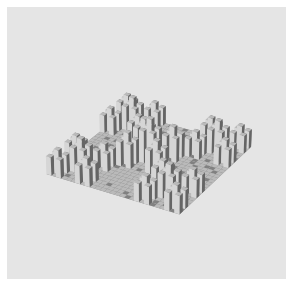

In [229]:
fig, (ax1) = plt.subplots(1,1, subplot_kw=dict(projection='3d'), figsize=(5,5))
#standard bar3d
ax1.bar3d(X.ravel(), Y.ravel(), np.zeros(X.size), 1, 1, cas2.ravel(), '0.95')
ax1.axis('off')
ax1.set_yticklabels([])
ax1.margins(-0.49,-0.49,1, tight=False)
ax1.

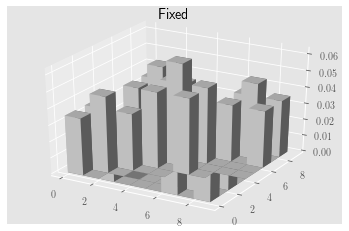

In [180]:
fig, (ax2) = plt.subplots(1,1, subplot_kw=dict(projection='3d'))
ax2.set_title('Fixed')

xyz = np.array(sph2cart(*sphview(ax2)), ndmin=3).T       #camera position in xyz
zo = np.multiply([X, Y, np.zeros_like(cas3)], xyz).sum(0)  #"distance" of bars from camera

bars = np.empty(X.shape, dtype=object)
for i, (x,y,dz,o) in enumerate(ravzip(X, Y, cas2, zo)):
    j, k = divmod(i, 9)
    bars[j, k] = pl = ax2.bar3d(x, y, 0, 1, 1, dz, '0.85')
    pl._sort_zpos = o

plt.show()

In [174]:
j, k = divmod(i, res)

In [178]:
res

15

In [172]:
Y

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8]])

In [141]:
dy

0.34285714285714275

In [125]:
plt.bar3d(X.ravel(), Y.ravel(), np.zeros(X.size), dx, dy, Zg.ravel(), '0.85')

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar3d'

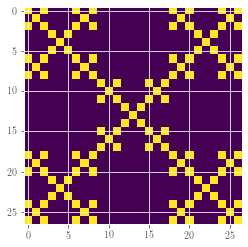

In [132]:
plt.imshow(cas3)